# Lead Score

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

In [1]:
#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score,roc_curve, precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

### Data import 

In [3]:
#Read dataset
df = pd.read_csv("Leads.csv")

#check the head
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Find the shape of data
df.shape

(9240, 37)

In [5]:
#Inspect the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Summaries the numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [7]:
# Understanding Categorical Values

df.select_dtypes(include = 'object').describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,85e50f1d-5c21-4d10-a1a0-6a511b39420b,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


### Data Cleaning

In [8]:
#Check for nulls
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#Get the persentage if nulls
round(df.isnull().sum()/df.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [10]:
# Dropping all columns with null values more than 40% 

df.drop(df.isnull().sum()[(df.isnull().sum()/df.shape[0]*100)>40].index,1, inplace = True)

In [11]:
#Check the head, if the columns are droped
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [12]:
#Lets drop the Sales Team Data columns
df = df.drop(['Tags','Lead Profile','Last Notable Activity','Last Activity'],axis=1)

#Inspect the drops
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


### Missing Value Handling

In [13]:
# Inspecting the entries in each column

for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print()
    print("**********************************************************************")
    print()

Prospect ID
85e50f1d-5c21-4d10-a1a0-6a511b39420b    1
0c15052a-9f8a-47c4-9fc3-eb20c84ffd74    1
85057e01-5d12-449b-a690-c309855ceacd    1
61602d82-4a82-45a0-9545-ed6430e25370    1
a27000ab-4a0b-4231-9ee2-a1a9e85b90ef    1
                                       ..
252a95d5-95db-425e-9d74-0ea948a369e6    1
2c9ee018-0f52-4596-aa29-f65210d917d1    1
6578585b-fd38-4f36-8bfb-35e531848e63    1
75e73b61-b064-4759-827d-aea1c6b50c58    1
6b142314-ab04-4b05-9a57-90105cb2b91a    1
Name: Prospect ID, Length: 9240, dtype: int64

**********************************************************************

Lead Number
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64

**********************************************************************

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quic

There are 'SELECT' values in multiple columns. The select either means the person doesn't belong to this category so he didn't select, or he is not interested in providing this information.

In [14]:
# Determining the % of cases with "Select"

print(round(df["Specialization"].value_counts()[df["Specialization"].value_counts().index=="Select"]/df.shape[0]*100,2))
print(round(df["How did you hear about X Education"].value_counts()[df["How did you hear about X Education"].value_counts().index=="Select"]/df.shape[0]*100,2))
print(round(df["City"].value_counts()[df["City"].value_counts().index=="Select"]/df.shape[0]*100,2))

Select    21.02
Name: Specialization, dtype: float64
Select    54.58
Name: How did you hear about X Education, dtype: float64
Select    24.34
Name: City, dtype: float64


In [15]:
#Conver the SELECT to NAN values in the columns
df1 = df.apply(lambda x: x.replace('Select',np.nan))
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


In [16]:
#Check for missing value percentage after impoting Select as nan
round(df1.isnull().sum()/df1.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [17]:
#Missing values for 'How did you hear about X Education' is very high, so we drop the columns
df1 = df1.drop('How did you hear about X Education',axis=1)

#Check the head
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


### Missing rows

Inspect the missing values in each row, if they are 50% missing, then drop those rows 

In [18]:
#Check the percentage of missing values in rows
round(df1.isnull().sum(axis = 1)/df1.shape[0],2)*100

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9235    0.0
9236    0.0
9237    0.0
9238    0.0
9239    0.0
Length: 9240, dtype: float64

In [19]:
#Checking for rows with missing percentage greater than 50%
miss_row = (df1.isnull().sum(axis = 1)/ df1.shape[0]) > 0.5

#Check the boolean values
miss_row

0       False
1       False
2       False
3       False
4       False
        ...  
9235    False
9236    False
9237    False
9238    False
9239    False
Length: 9240, dtype: bool

In [20]:
#Checking if there are any true values in miss_row
miss_row.value_counts()

False    9240
dtype: int64

No rows have null values,

### Handling Categorical variables

The columns like 'Do Not Call', 'What matters most to you in choosing a course','Search','Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque', have only one class which has 95%. So these columns will not give any inference about the data, so we can drop them.

In [21]:
#Checking High Imbalance Columns:

High_Imbalance =["Do Not Call","What matters most to you in choosing a course","Search","Magazine","Newspaper Article",
               "X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses",
               "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"]

In [22]:
#Drop the columns which yield no inference
df1 = df1.drop(High_Imbalance , axis=1)

#Check the head
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,NaN,NaN,Unemployed,NaN,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,India,NaN,Unemployed,NaN,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,NaN,Unemployed,Mumbai,No


Column like 'Country' have very skewed data, which could lead to wrong analysis, so we drop them.

In [23]:
#Droping skewd column
df1 = df1.drop(['Country'], axis=1)

#Check the head
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,NaN,Unemployed,NaN,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,NaN,Unemployed,NaN,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,NaN,Unemployed,Mumbai,No


Columns like 'Lead Source','Specialization','What is your current occupation','City' have many categories, so while creating dummy variables, this will lead to addition of too many variables, hence comibine the less percentage labels to 'Others'.

In [24]:
# Checking unique value counts 
df1['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
blog                    1
testone                 1
WeLearn                 1
NC_EDM                  1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

In [25]:
# Merging 2 Google into one category
df1['Lead Source'] = df1['Lead Source'].replace('google', 'Google')

In [26]:
#Checking the null values
df1["Lead Source"].isna().sum()

36

In [27]:
#Drop rows from the columns 'Lead Source as ther less than 0.1%'
df1.dropna(subset=['Lead Source'], inplace=True)

In [28]:
#Check if the null values still exist
df1['Lead Source'].isna().sum()

0

In [29]:
#Get all the unique lables from the column 'Lead Source'
unique_val = df1['Lead Source'].unique()[4:]

#Check the columns
unique_val

array(['Referral Sites', 'Welingak Website', 'Reference', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [30]:
#Replace all the other lables with very less percentage to 'Others'
for i in unique_val:
    df1['Lead Source']= df1['Lead Source'].apply(lambda x: x.replace(i, 'Others'))

In [31]:
# Checking unique value counts 
df1['Lead Source'].value_counts()

Google                2873
Direct Traffic        2543
Olark Chat            1755
Organic Search        1154
Others                 878
welearnOthers_Home       1
Name: Lead Source, dtype: int64

In [32]:
df1.replace('welearnOthers_Home',"Others",inplace = True)

In [33]:
# Checking unique value counts 
df1['Specialization'].value_counts()

Finance Management                   973
Human Resource Management            847
Marketing Management                 837
Operations Management                502
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                158
Hospitality Management               114
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [34]:
#Check if the null values still exist
df1['Specialization'].isna().sum()

3352

In [35]:
#Find the most frequent lable in column Specialization
mode_val = df1['Specialization'].mode()

#check the most frequent
mode_val

0    Finance Management
dtype: object

In [36]:
#Replace the missing values with the 'Mode'
df1['Specialization'] = df1['Specialization'].fillna(mode_val[0])

#Check for the missing values
df1['Specialization'].isnull().sum()

0

In [37]:
#Replaceing the column labels to 'Others' which have less percentage 
df1['Specialization'] = df1['Specialization'].replace(['Business Administration','Media and Advertising', 
                                                        'Supply Chain Management','IT Projects Management', 
                                                        'Travel and Tourism','Banking, Investment And Insurance',
                                                        'International Business','E-COMMERCE',
                                                        'Operations Management', 'Retail Management',
                                                        'Services Excellence', 'Hospitality Management',
                                                        'Rural and Agribusiness', 'Healthcare Management', 
                                                        'E-Business'], 'Others')

#Check the value counts
round(df1['Specialization'].value_counts(normalize=True),2)*100

Finance Management           47.0
Others                       35.0
Human Resource Management     9.0
Marketing Management          9.0
Name: Specialization, dtype: float64

In [38]:
#Replacing the less percentage labels with others in column'What is your current occupation'
df1['What is your current occupation'] = df1['What is your current occupation'].replace(['Student','Other','Housewife','Businessman'])

#Check the value counts 
round(df1['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              89.0
Working Professional    11.0
Name: What is your current occupation, dtype: float64

In [39]:
#Find the mode to impute the null values with it
mode_occ = df1['What is your current occupation'].mode()

#Check the mode
mode_occ

0    Unemployed
dtype: object

In [40]:
#Replace the missing values with the 'Mode'
df1['What is your current occupation'] = df1['What is your current occupation'].fillna(mode_occ[0])

#Check for the missing values
df1['What is your current occupation'].isnull().sum()

0

In [41]:
#Replacing the less percentage labels with others in column'City'
df1['City'] = df1['City'].replace(['Other Cities','Other Cities of Maharashtra','Other Metro Cities','Tier II Cities'],'Others')

round(df1['City'].value_counts(normalize=True),2)*100

Mumbai               58.0
Others               29.0
Thane & Outskirts    13.0
Name: City, dtype: float64

In [42]:
#Find the mode to impute the null values with it
mode_city = df1['City'].mode()

#Check the mode
mode_city

0    Mumbai
dtype: object

In [43]:
#Replace the missing values with the 'Mode'
df1['City'] = df1['City'].fillna(mode_city[0])

#Check for the missing values
df1['City'].isnull().sum()

0

### Outliers Handling

In [44]:
#Gettinf all numeric values
df.select_dtypes(exclude='O').columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [45]:
#Funcation for displaying outliers in columns
def find_outliers(list_of_col):
    plt.figure(figsize=[15,5])
    for i in enumerate(list_of_col):
        sns.set_style('whitegrid')
        plt.subplot(round(len(list_of_col)/3),3,i[0]+1)
        sns.boxplot(data=df1, x=i[1])
        plt.xlabel(i[1], fontdict={'fontsize':15,'color':'Green'})
        if len(df1[i[1]].value_counts()) > 8:
            plt.xticks(rotation=90)


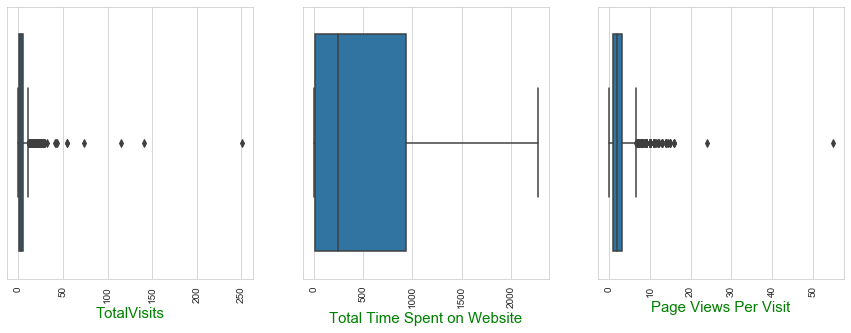

In [46]:
#Plot boxplot to find ouliers
find_outliers([ 'TotalVisits','Total Time Spent on Website', 'Page Views Per Visit'])

Columns 'TotalVisits' and 'Page Views Per Visit' seems to have ouliers, so lets check their 75,90,95,99 percentails.

In [47]:
#Finding the percentails
df1.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.000000,9204.000000,9074.000000,9204.000000,9074.000000
mean,617194.608648,0.383746,3.456028,489.005541,2.370151
std,23418.830233,0.486324,4.858802,547.980340,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,14.000000,1.000000
50%,615479.000000,0.000000,3.000000,250.000000,2.000000
75%,637409.250000,1.000000,5.000000,938.000000,3.200000
90%,650513.100000,1.000000,7.000000,1380.000000,5.000000
95%,655405.850000,1.000000,10.000000,1562.000000,6.000000
99%,659599.460000,1.000000,17.000000,1839.970000,9.000000


Since the columns 'TotalVisits' and 'Page Views Per Visit' have values doubled from 99% to max, we can confirm they are outliers. To handle this ouliers we use the interquartile range(IQR) method. 
Which is given by the formula: 
- Q1 - FInd the 25th percentile 
- Q3 - Find the 75th percentile
- IQR = Q3 - Q1

In [48]:
#Handling the ouliers in columns 'TotalVisits' by IQR method
#Assign the percentiles 
Q1 = df1['TotalVisits'].quantile(0.25)
Q3 = df1['TotalVisits'].quantile(0.75)

#Calculate IQR
IQR = Q3 - Q1

#Upper and lower fence define
upp_fence = Q3 + 1.5*IQR
low_fence = Q1 - 1.5*IQR

#Subset based on fence
df1 = df1.loc[(df1['TotalVisits'] >= low_fence) & (df1['TotalVisits'] <= upp_fence)]

In [49]:
#Handling the ouliers in columns 'Page Views Per Visit' by IQR method
#Assign the percentiles 
Q1 = df1['Page Views Per Visit'].quantile(0.25)
Q3 = df1['Page Views Per Visit'].quantile(0.75)

#Calculate IQR
IQR = Q3 - Q1

#Upper and lower fence define
upp_fence = Q3 + 1.5*IQR
low_fence = Q1 - 1.5*IQR

#Subset based on fence
df1 = df1.loc[(df1['Page Views Per Visit'] >= low_fence) & (df1['Page Views Per Visit'] <= upp_fence)]

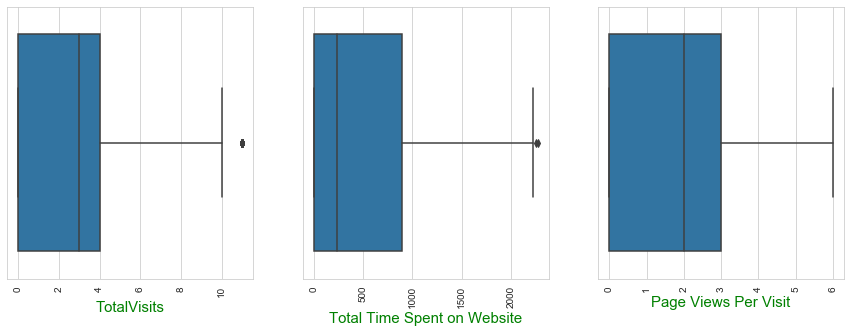

In [50]:
#Rechecking the outliers
find_outliers([ 'TotalVisits','Total Time Spent on Website', 'Page Views Per Visit'])

### Univariate Analysis-Numeric

In [51]:
df1.select_dtypes(exclude='O').columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [52]:
#Funcation to do univariant analysis
def uni_ana_distplot(col):
    plt.figure(figsize=[10,10])
    for i in enumerate(col):
        plt.subplot(round(len(col)/2),2,i[0]+1)
        sns.distplot(df1[i[1]])
        plt.title(i[1], fontdict={'fontsize':20,'color':'Green'})

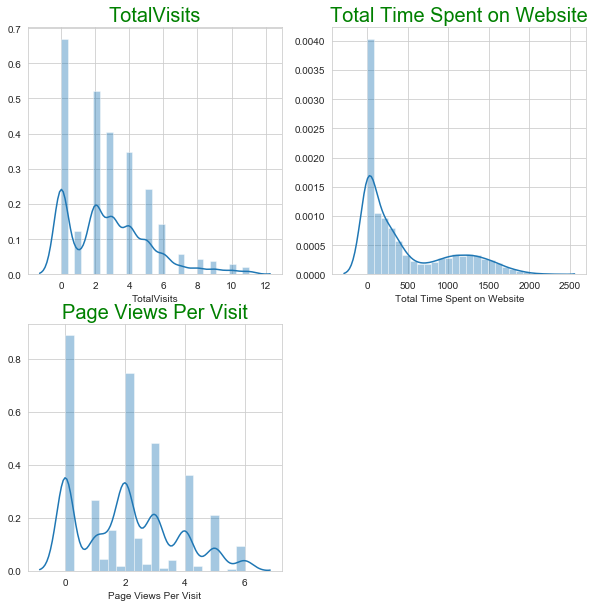

In [53]:
#Plot the numeric columns with distplot
uni_ana_distplot(['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit'])

### Univariate Analysis - Categorical

In [54]:
df1.select_dtypes(include='O').columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [55]:
#Function for purforming univariate analysis for categorical variables
def uni_ana_countplot(col1, col2):
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    sns.countplot(data=df1, x=col1, order=df1[col1].value_counts().index)
    plt.title(col1, fontdict={'fontsize':20,'color':'Green'})
    if len(df1[col1].value_counts())> 3:
        plt.xticks(rotation=90)
    elif len(df1[col1].value_counts()) < 3:
        plt.xticks(rotation=60)
        
    plt.subplot(1,2,2)
    sns.countplot(data=df1, x=col2, order=df1[col2].value_counts().index)
    plt.title(col2, fontdict={'fontsize':20,'color':'Green'})
    if len(df1[col2].value_counts()) > 3:
        plt.xticks(rotation=90)
    elif len(df1[col2].value_counts()) < 3:
        plt.xticks(rotation=60)
    plt.show()

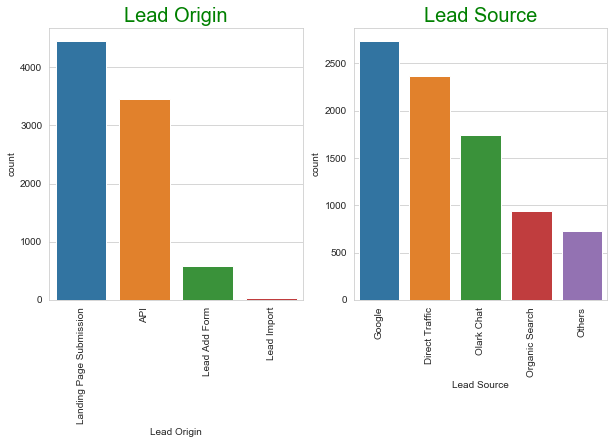

In [56]:
#Plot the categorical variables using the countplot
uni_ana_countplot('Lead Origin','Lead Source')

We observe that Maximum leads are originated fron Landing Page and Very Few from Imported.

We can also see Google has contributed to Maximum Source of Lead generation.

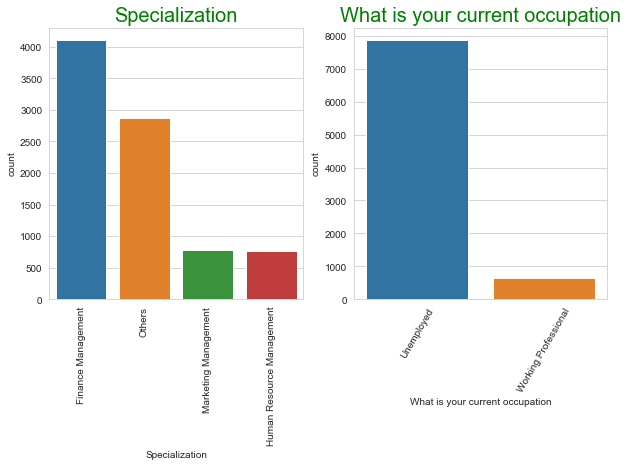

In [57]:
#Plot the categorical variables using the countplot
uni_ana_countplot('Specialization', 'What is your current occupation')

We can observe that People from Financial Management and unemployed are inclined to upgrading skills

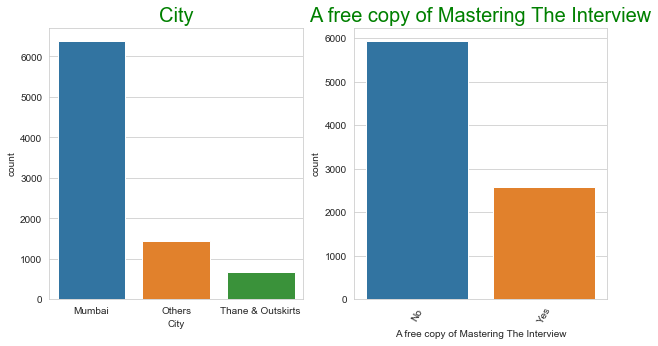

In [58]:
#Plot the categorical variables using the countplot
uni_ana_countplot('City','A free copy of Mastering The Interview')

Maximum Leads are generated from Mumbai, We can also see that many has not opted for A free copy of Mastering The Interview

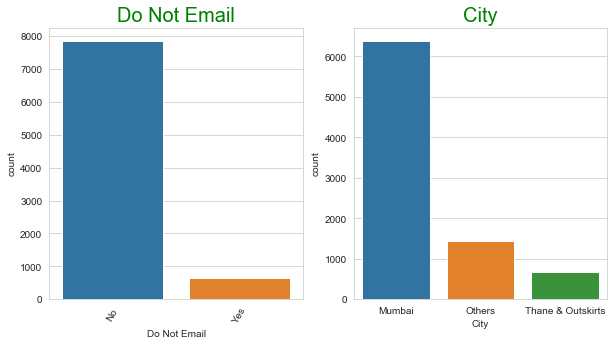

In [59]:
#Plot the categorical variables using the countplot
uni_ana_countplot('Do Not Email', 'City')

### Bivariate Analysis - Numerical

In [60]:
#Function for finding bivariate analysis for numerical
def bi_ana_num(col):
    plt.figure(figsize=[13,10])
    for i in enumerate(col):
        plt.subplot(round(len(col)/2),2,i[0]+1)
        sns.boxplot(y=df1[i[1]],x=df1["Converted"])
        plt.title(i[1], fontdict={'fontsize':20,'color':'Green'})

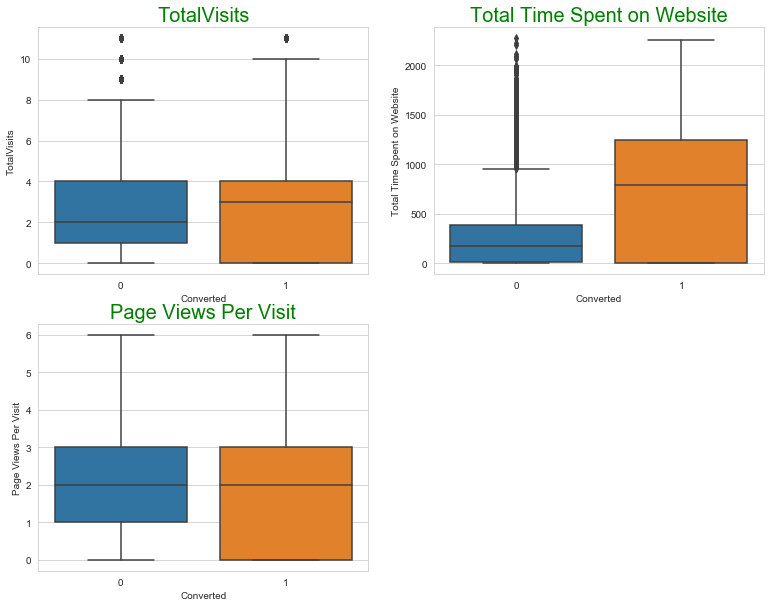

In [61]:
#Plot the numerical variables using the boxplot
bi_ana_num(['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit'])

We observe that When Visit to the Website and Time Spent on Website is increasing they are more inclined to take up the course

### Bivariate Analysis - Categorical

In [62]:
#Function for finding bivariate analysis for categorical
def bi_ana_bar(col1, col2):
    plt.figure(figsize=[15,6])
    ax = plt.subplot(1,2,1)
    round(pd.crosstab(df1[col1],df1.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
    plt.title(col1, fontdict={'fontsize':20,'color':'Green'})
    if len(df1[col1].value_counts())> 3:
        plt.xticks(rotation=90)
    elif len(df1[col1].value_counts()) < 3:
        plt.xticks(rotation=60)
        
    ax=plt.subplot(1,2,2)
    round(pd.crosstab(df1[col2],df1.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
    plt.title(col2, fontdict={'fontsize':20,'color':'Green'})
    if len(df1[col2].value_counts()) > 3:
        plt.xticks(rotation=90)
    elif len(df1[col2].value_counts()) < 3:
        plt.xticks(rotation=60)
    plt.show()

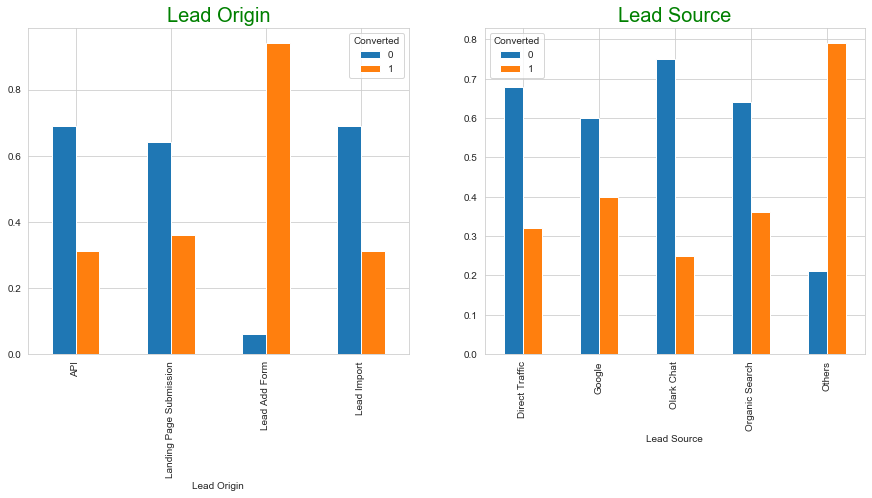

In [63]:
#Plot for the categorical to analyse bivariate changes
bi_ana_bar('Lead Origin','Lead Source')

We observe that when the leads is from the Add form, Convertion rate is higher. Xedcation must focus on Lead Add form.

When the lead source is from Other Sorces -conversion rate 80%,  Google conversion rate is 40%, Direct traffic 30%, Olark Chat - 25%, Organic Search - 35%

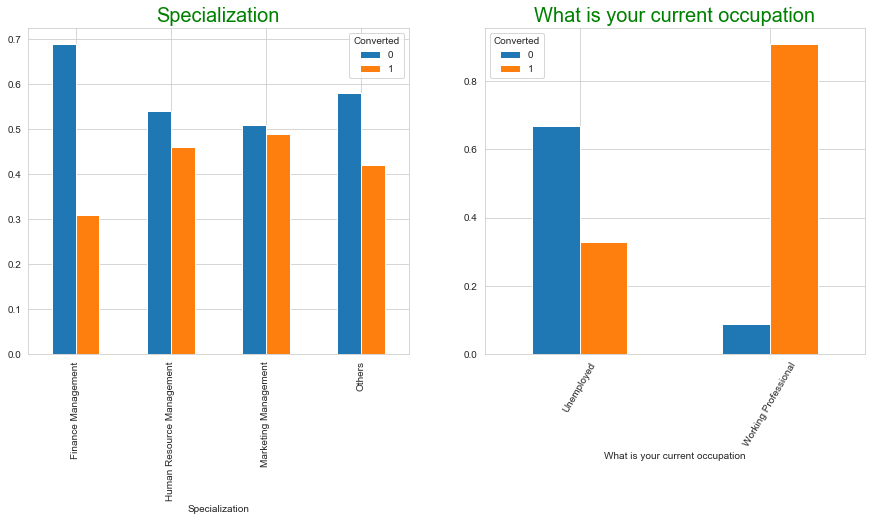

In [64]:
#Plot for the categorical to analyse bivariate changes
bi_ana_bar('Specialization', 'What is your current occupation')

Maximum Conversion are from HR Professionals, Marketing Professionals.

Working Professionals have showed interest in upskilling. 

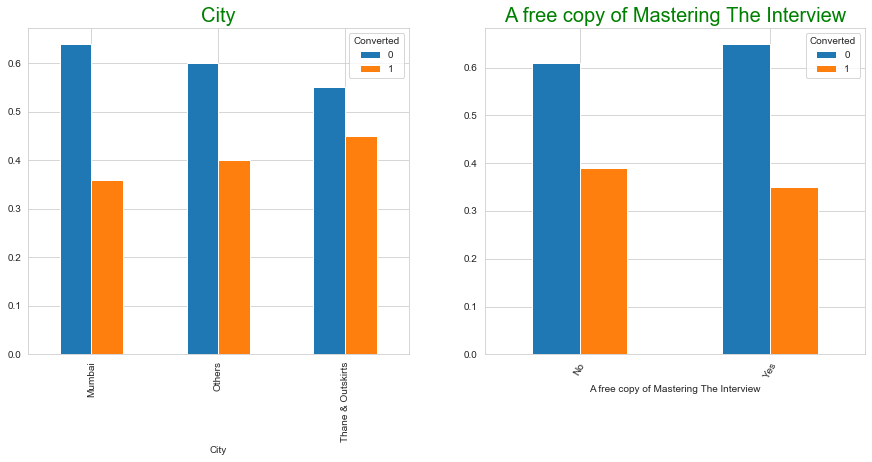

In [65]:
#Plot for the categorical to analyse bivariate changes
bi_ana_bar('City','A free copy of Mastering The Interview')

Conversion from Thane and Outskirts are higher than in mumbai and other cities.

People who has not prefered for Mastering the Interview copy has higher convertion rate

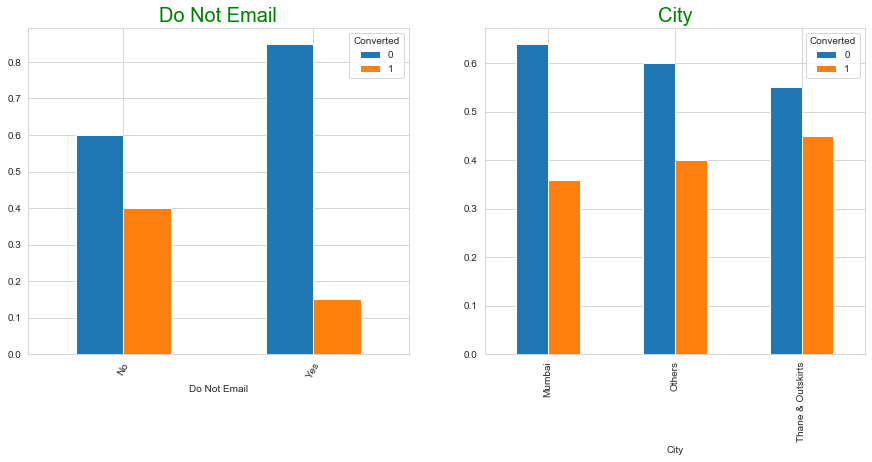

In [66]:
#Plot for the categorical to analyse bivariate changes
bi_ana_bar('Do Not Email', 'City')

### Imbalance Dataset Check

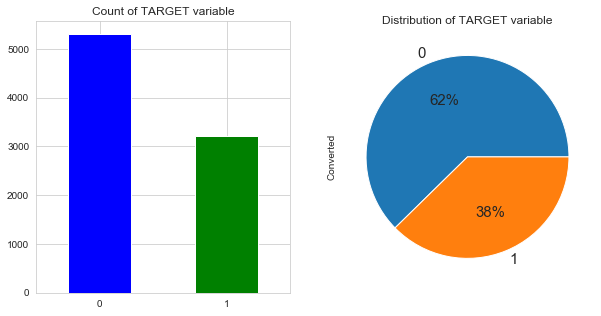

In [67]:
# Plot representing the Imbalance Percentage in df1 DataFrame
plt.figure(figsize=(10,5))
plt.subplot(121)
df1["Converted"].value_counts().plot.bar(color = ["blue","green"])
plt.title("Count of TARGET variable")
plt.xticks(rotation=0)

plt.subplot(122)
df1["Converted"].value_counts().plot.pie(autopct='%1.0f%%', fontsize = 15)
plt.title("Distribution of TARGET variable")
plt.show()

There is some amount of imbalance in the dataset, only 38% of the leads are converted.

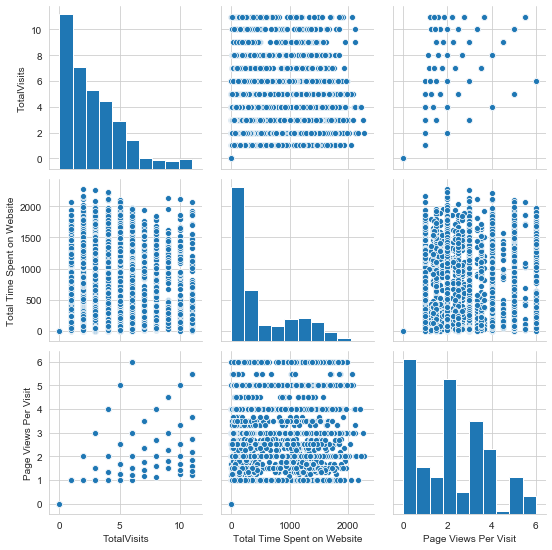

In [68]:
#Find the pairplot
sns.pairplot(df1, vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.show()

We observe that Total Visits and Page Views per visit are Positively Correlated

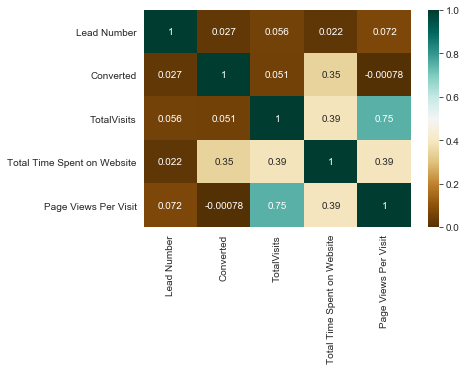

In [69]:
#Find the correlation
corr = df1.corr()

#Plot the correlation matrix
sns.heatmap(corr, annot=True, cmap="BrBG")
plt.show()

In [70]:
#Checking the Percentage of Data retained

round((100*df1.shape[0]/9240),2)

92.13

We have retained almost 92% of Data for our analysis

### Data Preparation

In [71]:
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Finance Management,Unemployed,Mumbai,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Finance Management,Unemployed,Mumbai,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Others,Unemployed,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Unemployed,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Finance Management,Unemployed,Mumbai,No


As part of data preparation convert all the labels in each category to numerical variables.

In [72]:
#Convert the categorical to dummy variables
dummies = pd.get_dummies(df1[['Lead Origin', 'Lead Source', 'Do Not Email',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview']], drop_first=True)

#Check the dummies dataframe
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Do Not Email_Yes,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,What is your current occupation_Working Professional,City_Others,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [73]:
#Lets drop the original columns from the dataframe
df1 = df1.drop(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'], axis = 1)

#Check if they are dropped
df1.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0


In [74]:
#Merge the two dataframes, dummies and df1
leads = pd.concat([df1,dummies], axis=1)

#Check the newly created dataframe
leads.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Do Not Email_Yes,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,What is your current occupation_Working Professional,City_Others,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [75]:
#Check the shape
leads.shape

(8513, 21)

In [76]:
### Checking the convertion Rate
convert = (sum(leads['Converted'])/len(leads['Converted'].index))*100
convert

37.66004933630918

There is 37% of convertion rate in the dataset.

## Model Building

In [77]:
#Copy the original dataframe to another dataframe
leads1 = leads.copy()

In [78]:
#assign dependent and independent variables
y = leads1['Converted']
X = leads1.drop(['Converted','Prospect ID'], axis = 1) 

In [79]:
#Fine the head of X
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Do Not Email_Yes,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,What is your current occupation_Working Professional,City_Others,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes
0,660737,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,660719,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [80]:
#Find the head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Train– test split

In [81]:
# Splitting the data into train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [82]:
#Check the shape of the split dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5959, 19)
(5959,)
(2554, 19)
(2554,)


### Feature Scaling

In [83]:
#get all the numerical columns
num_col = ['Lead Number','TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']

#define the function
scaler = StandardScaler()

#Fit and transform the numerical columns
X_train[num_col] = scaler.fit_transform(X_train[num_col])

#Check if they are converted
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Do Not Email_Yes,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,What is your current occupation_Working Professional,City_Others,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes
5123,-0.277384,-1.153092,-0.867873,-1.253080,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6322,-0.677652,-0.743258,0.108309,-0.648118,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3644,0.358355,1.305912,-0.842280,0.561805,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3011,0.594342,0.896078,-0.451076,0.259325,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8140,-1.267941,-0.743258,-0.767330,-0.648118,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Feature Selection

In [84]:
#Add the constant
X_train_sm = sm.add_constant(X_train)

#Building the model
glm = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())

#Fit the model
logm = glm.fit()

#Summary
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5939
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.8
Date:                Sun, 13 Jun 2021   Deviance:                       5573.7
Time:                        21:06:57   Pearson chi2:                 6.06e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3948      0.125    -11.175      0.000      -1.639      -1.150
Lead Number                                              0.0003      0.035      0.010      0.992      -0.067       0.068
TotalVisits                                              0.2528      0.050      5.030      0.000       0.154       0.351
Total Time Spent on Website                              1.0913      0.039     27.680      0.000       1.014       1.169
Page Views Per Visit                                    -0.0406      0.058     -0.699      0.484      -0.154       0.073
Lead Origin_Landing Page Submission                     -0.2946      0.116     -2.530      0.011      -0.523      -0.066
Lead Origin_Lead Add Form                                5.1429      0.380     13.525      0.000       4.398       5.888
Lead Origin_Lead Import                                  1.5894      0.625      2.541      0.011       0.364       2.815
Lead Source_Google                                       0.2031      0.112      1.809      0.070      -0.017       0.423
Lead Source_Olark Chat                                   1.2081      0.157      7.676      0.000       0.900       1.517
Lead Source_Organic Search                               0.0755      0.130      0.579      0.563      -0.180       0.331
Lead Source_Others                                      -0.4116      0.321     -1.282      0.200      -1.041       0.218
Do Not Email_Yes                                        -1.3483      0.166     -8.110      0.000      -1.674      -1.022
Specialization_Human Resource Management                 0.4587      0.135      3.409      0.001       0.195       0.722
Specialization_Marketing Management                      0.4949      0.133      3.724      0.000       0.234       0.755
Specialization_Others                                    0.5321      0.099      5.371      0.000       0.338       0.726
What is your current occupation_Working Professional     2.5995      0.177     14.673      0.000       2.252       2.947
City_Others                                              0.1850      0.097      1.905      0.057      -0.005       0.375
City_Thane & Outskirts                                   0.2448      0.126      1.938      0.053      -0.003       0.492
A free copy of Mastering The Interview_Yes              -0.1359      0.107     -1.272      0.204      -0.345       0.074
========================================================================================================================
"""

### Feature Selection using RFE

In [85]:
#Build model using RFE
lg = LogisticRegression()

#RFE model
rfe = RFE(lg, 15)

#Fit RFE
rfe = rfe.fit(X_train, y_train)


In [86]:
#Display the support
rfe.support_

array([False,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [87]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 5),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', False, 4),
 ('Do Not Email_Yes', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Others', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Others', True, 1),
 ('City_Thane & Outskirts', True, 1),
 ('A free copy of Mastering The Interview_Yes', True, 1)]

In [88]:
#Assign the support which is true to col
col = X_train.columns[rfe.support_]

#Check the col
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Do Not Email_Yes',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management', 'Specialization_Others',
       'What is your current occupation_Working Professional', 'City_Others',
       'City_Thane & Outskirts', 'A free copy of Mastering The Interview_Yes'],
      dtype='object')

In [89]:
#Get the False support columns
X_train.columns[~rfe.support_]

Index(['Lead Number', 'Page Views Per Visit', 'Lead Source_Organic Search',
       'Lead Source_Others'],
      dtype='object')

In [90]:
#Adding the constant
X_train_rfe = sm.add_constant(X_train[col])

#Build the model using GLM
logm2 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())

#Fit the model
res1 = logm2.fit()

#Summaries
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2788.3
Date:                Sun, 13 Jun 2021   Deviance:                       5576.7
Time:                        21:06:59   Pearson chi2:                 6.05e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3992      0.101    -13.825      0.000      -1.598      -1.201
TotalVisits                                              0.2370      0.044      5.446      0.000       0.152       0.322
Total Time Spent on Website                              1.0910      0.039     27.688      0.000       1.014       1.168
Lead Origin_Landing Page Submission                     -0.3054      0.110     -2.775      0.006      -0.521      -0.090
Lead Origin_Lead Add Form                                4.7693      0.241     19.782      0.000       4.297       5.242
Lead Origin_Lead Import                                  1.2129      0.552      2.196      0.028       0.130       2.296
Lead Source_Google                                       0.2015      0.095      2.129      0.033       0.016       0.387
Lead Source_Olark Chat                                   1.2430      0.141      8.805      0.000       0.966       1.520
Do Not Email_Yes                                        -1.3413      0.166     -8.082      0.000      -1.667      -1.016
Specialization_Human Resource Management                 0.4527      0.134      3.371      0.001       0.190       0.716
Specialization_Marketing Management                      0.4889      0.133      3.686      0.000       0.229       0.749
Specialization_Others                                    0.5287      0.099      5.353      0.000       0.335       0.722
What is your current occupation_Working Professional     2.6062      0.177     14.713      0.000       2.259       2.953
City_Others                                              0.1897      0.097      1.957      0.050      -0.000       0.380
City_Thane & Outskirts                                   0.2385      0.126      1.892      0.058      -0.009       0.485
A free copy of Mastering The Interview_Yes              -0.1199      0.104     -1.153      0.249      -0.324       0.084
========================================================================================================================
"""

In [91]:
#Drop the constant variable
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [92]:
#Function for find the VIF
def VIF(X_train_rfe):
    # create a dummy dataframe
    vif = pd.DataFrame()
    
    # extract the column values to vif features column value
    vif['Features'] = X_train_rfe.columns
    
    # calculate vif for the train data for the added features
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    
    # round the value to 2 decimals
    vif['VIF'] = round(vif['VIF'], 2)
    
    # sort values by hightevif value first
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # retrun vif object
    return vif

In [93]:
#Check the VIF
VIF(X_train_rfe)

,Features,VIF
2,Lead Origin_Landing Page Submission,4.87
10,Specialization_Others,2.83
14,A free copy of Mastering The Interview_Yes,2.63
0,TotalVisits,1.82
5,Lead Source_Google,1.63
6,Lead Source_Olark Chat,1.56
12,City_Others,1.48
8,Specialization_Human Resource Management,1.44
9,Specialization_Marketing Management,1.40
3,Lead Origin_Lead Add Form,1.39


In [94]:
#Droping the column 'A free copy of Mastering The Interview_Yes' as it has higher p values
X_train_Int = X_train_rfe.drop('A free copy of Mastering The Interview_Yes', axis=1)

#Adding the constant
X_train_Int = sm.add_constant(X_train_Int)

#Build the model using GLM
logm3 = sm.GLM(y_train,X_train_Int, family = sm.families.Binomial())

#Fit the model
res2 = logm3.fit()

#Summaries
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5944
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2789.0
Date:                Sun, 13 Jun 2021   Deviance:                       5578.0
Time:                        21:07:00   Pearson chi2:                 6.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4381      0.096    -15.030      0.000      -1.626      -1.251
TotalVisits                                              0.2356      0.044      5.414      0.000       0.150       0.321
Total Time Spent on Website                              1.0902      0.039     27.681      0.000       1.013       1.167
Lead Origin_Landing Page Submission                     -0.3402      0.106     -3.211      0.001      -0.548      -0.133
Lead Origin_Lead Add Form                                4.8075      0.239     20.122      0.000       4.339       5.276
Lead Origin_Lead Import                                  1.2577      0.551      2.283      0.022       0.178       2.338
Lead Source_Google                                       0.2588      0.081      3.205      0.001       0.100       0.417
Lead Source_Olark Chat                                   1.2779      0.138      9.252      0.000       1.007       1.549
Do Not Email_Yes                                        -1.3357      0.166     -8.059      0.000      -1.661      -1.011
Specialization_Human Resource Management                 0.4419      0.134      3.300      0.001       0.179       0.704
Specialization_Marketing Management                      0.4806      0.132      3.629      0.000       0.221       0.740
Specialization_Others                                    0.5155      0.098      5.255      0.000       0.323       0.708
What is your current occupation_Working Professional     2.6121      0.177     14.733      0.000       2.265       2.960
City_Others                                              0.1821      0.097      1.883      0.060      -0.007       0.372
City_Thane & Outskirts                                   0.2406      0.126      1.909      0.056      -0.006       0.488
========================================================================================================================
"""

In [95]:
#Drop the constant variable
X_train_Int = X_train_Int.drop(['const'], axis=1)

In [96]:
#Check the VIF
VIF(X_train_Int)

,Features,VIF
2,Lead Origin_Landing Page Submission,3.68
10,Specialization_Others,2.77
0,TotalVisits,1.81
6,Lead Source_Olark Chat,1.56
12,City_Others,1.47
8,Specialization_Human Resource Management,1.42
3,Lead Origin_Lead Add Form,1.39
9,Specialization_Marketing Management,1.39
5,Lead Source_Google,1.36
1,Total Time Spent on Website,1.33


In [97]:
#Droping the column 'City_Others' as it has higher p values
X_train_city = X_train_Int.drop('City_Others', axis=1)

#Adding the constant
X_train_city = sm.add_constant(X_train_city)

#Build the model using GLM
logm4 = sm.GLM(y_train,X_train_city, family = sm.families.Binomial())

#Fit the model
res3 = logm4.fit()

#Summaries
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5945
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2790.8
Date:                Sun, 13 Jun 2021   Deviance:                       5581.5
Time:                        21:07:00   Pearson chi2:                 6.00e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4203      0.095    -14.937      0.000      -1.607      -1.234
TotalVisits                                              0.2357      0.043      5.420      0.000       0.150       0.321
Total Time Spent on Website                              1.0909      0.039     27.705      0.000       1.014       1.168
Lead Origin_Landing Page Submission                     -0.3121      0.105     -2.977      0.003      -0.518      -0.107
Lead Origin_Lead Add Form                                4.7966      0.239     20.091      0.000       4.329       5.264
Lead Origin_Lead Import                                  1.3395      0.551      2.432      0.015       0.260       2.419
Lead Source_Google                                       0.2375      0.080      2.973      0.003       0.081       0.394
Lead Source_Olark Chat                                   1.2660      0.138      9.190      0.000       0.996       1.536
Do Not Email_Yes                                        -1.3344      0.166     -8.047      0.000      -1.659      -1.009
Specialization_Human Resource Management                 0.4593      0.134      3.439      0.001       0.197       0.721
Specialization_Marketing Management                      0.4960      0.132      3.752      0.000       0.237       0.755
Specialization_Others                                    0.5451      0.097      5.627      0.000       0.355       0.735
What is your current occupation_Working Professional     2.6171      0.177     14.750      0.000       2.269       2.965
City_Thane & Outskirts                                   0.1904      0.123      1.548      0.122      -0.051       0.432
========================================================================================================================
"""

In [98]:
#Drop the constant variable
X_train_city = X_train_city.drop(['const'], axis=1)

In [99]:
#Check the VIF
VIF(X_train_city)

,Features,VIF
2,Lead Origin_Landing Page Submission,3.47
10,Specialization_Others,2.68
0,TotalVisits,1.81
6,Lead Source_Olark Chat,1.56
8,Specialization_Human Resource Management,1.41
3,Lead Origin_Lead Add Form,1.39
9,Specialization_Marketing Management,1.39
5,Lead Source_Google,1.34
1,Total Time Spent on Website,1.33
11,What is your current occupation_Working Profes...,1.18


In [100]:
#Droping the column 'City_Thane & Outskirts' as it has higher p values
X_train_city_out = X_train_city.drop('City_Thane & Outskirts', axis=1)

#Adding the constant
X_train_city_out = sm.add_constant(X_train_city_out)

#Build the model using GLM
logm5 = sm.GLM(y_train,X_train_city_out, family = sm.families.Binomial())

#Fit the model
res4 = logm5.fit()

#Summaries
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5946
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2792.0
Date:                Sun, 13 Jun 2021   Deviance:                       5583.9
Time:                        21:07:01   Pearson chi2:                 6.01e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4211      0.095    -14.948      0.000      -1.607      -1.235
TotalVisits                                              0.2365      0.043      5.443      0.000       0.151       0.322
Total Time Spent on Website                              1.0915      0.039     27.729      0.000       1.014       1.169
Lead Origin_Landing Page Submission                     -0.2983      0.104     -2.858      0.004      -0.503      -0.094
Lead Origin_Lead Add Form                                4.8160      0.238     20.196      0.000       4.349       5.283
Lead Origin_Lead Import                                  1.3389      0.551      2.430      0.015       0.259       2.419
Lead Source_Google                                       0.2459      0.080      3.085      0.002       0.090       0.402
Lead Source_Olark Chat                                   1.2709      0.138      9.232      0.000       1.001       1.541
Do Not Email_Yes                                        -1.3381      0.166     -8.071      0.000      -1.663      -1.013
Specialization_Human Resource Management                 0.4663      0.133      3.493      0.000       0.205       0.728
Specialization_Marketing Management                      0.5046      0.132      3.821      0.000       0.246       0.763
Specialization_Others                                    0.5537      0.097      5.726      0.000       0.364       0.743
What is your current occupation_Working Professional     2.6175      0.177     14.752      0.000       2.270       2.965
========================================================================================================================
"""

In [101]:
#Drop the constant variable
X_train_city_out1 = X_train_city_out.drop(['const'], axis=1)

In [102]:
#Check the VIF
VIF(X_train_city_out1)

,Features,VIF
2,Lead Origin_Landing Page Submission,3.43
10,Specialization_Others,2.67
0,TotalVisits,1.81
6,Lead Source_Olark Chat,1.55
8,Specialization_Human Resource Management,1.41
9,Specialization_Marketing Management,1.39
3,Lead Origin_Lead Add Form,1.38
5,Lead Source_Google,1.34
1,Total Time Spent on Website,1.33
11,What is your current occupation_Working Profes...,1.18


In [103]:
# Getting the predicted values on the train set
y_train_pred = res4.predict(X_train_city_out)
round(y_train_pred[:10],2)*100

5123    20.0
6322    19.0
3644    11.0
3011    15.0
8140    10.0
1339    89.0
211     92.0
661     56.0
2120    20.0
475     94.0
dtype: float64

In [104]:
#Reshape the column 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20259108, 0.18562749, 0.11067485, 0.14756655, 0.09726057,
       0.89321449, 0.91556728, 0.56105753, 0.20259108, 0.93869006])

In [105]:
#Create a dataframe
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

#Assign index to column ID
y_train_pred_final['ID'] = y_train.index

#Check the head
y_train_pred_final.head()

,Converted,Converted_Prob,ID
0,0,0.202591,5123
1,0,0.185627,6322
2,0,0.110675,3644
3,0,0.147567,3011
4,0,0.097261,8140


Lets add another column to dataframe called 'Predicted' which has 1 for threshold > 0.5 and 0 for theshold < 0.5.

In [106]:
#Create column Predicted based on threshold
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
0,0,0.202591,5123,0
1,0,0.185627,6322,0
2,0,0.110675,3644,0
3,0,0.147567,3011,0
4,0,0.097261,8140,0


In [107]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3266  440]
 [ 831 1422]]


In [108]:
#Find the model accuracy
accuracy = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

#Print the accuracy
round(accuracy,2)*100

79.0

In [109]:
#Droping the column 'Lead Origin_Lead Import' as it has higher p values
X_train_lead_orgn = X_train_city_out.drop('Lead Origin_Lead Import', axis=1)

#Adding the constant
X_train_lead_orgn = sm.add_constant(X_train_lead_orgn)

#Build the model using GLM
logm6 = sm.GLM(y_train,X_train_lead_orgn, family = sm.families.Binomial())

#Fit the model
res5 = logm6.fit()

#Summaries
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5947
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2794.4
Date:                Sun, 13 Jun 2021   Deviance:                       5588.8
Time:                        21:07:03   Pearson chi2:                 6.02e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3902      0.094    -14.803      0.000      -1.574      -1.206
TotalVisits                                              0.2276      0.043      5.265      0.000       0.143       0.312
Total Time Spent on Website                              1.0850      0.039     27.692      0.000       1.008       1.162
Lead Origin_Landing Page Submission                     -0.3208      0.104     -3.090      0.002      -0.524      -0.117
Lead Origin_Lead Add Form                                4.7680      0.237     20.086      0.000       4.303       5.233
Lead Source_Google                                       0.2326      0.079      2.930      0.003       0.077       0.388
Lead Source_Olark Chat                                   1.2249      0.136      9.014      0.000       0.959       1.491
Do Not Email_Yes                                        -1.3420      0.166     -8.103      0.000      -1.667      -1.017
Specialization_Human Resource Management                 0.4735      0.133      3.553      0.000       0.212       0.735
Specialization_Marketing Management                      0.5075      0.132      3.846      0.000       0.249       0.766
Specialization_Others                                    0.5595      0.097      5.785      0.000       0.370       0.749
What is your current occupation_Working Professional     2.6245      0.177     14.787      0.000       2.277       2.972
========================================================================================================================
"""

In [110]:
#Drop the constant variable
X_train_lead_orgn1 = X_train_lead_orgn.drop(['const'], axis=1)

In [111]:
#Check the VIF
VIF(X_train_lead_orgn1)

,Features,VIF
2,Lead Origin_Landing Page Submission,3.43
9,Specialization_Others,2.67
0,TotalVisits,1.80
5,Lead Source_Olark Chat,1.55
7,Specialization_Human Resource Management,1.41
3,Lead Origin_Lead Add Form,1.38
8,Specialization_Marketing Management,1.38
4,Lead Source_Google,1.34
1,Total Time Spent on Website,1.33
10,What is your current occupation_Working Profes...,1.18


In [112]:
#Reshape the column 
y_train_pred = res5.predict(X_train_lead_orgn).values.reshape(-1)

#Check the prob
y_train_pred[:10]

array([0.20272351, 0.19126158, 0.10958003, 0.14630683, 0.0992821 ,
       0.89449309, 0.91351613, 0.56083438, 0.20272351, 0.93895944])

In [113]:
y_train_pred_final['Converted_Prob'] = y_train_pred

Lets add another column to dataframe called 'Predicted' which has 1 for threshold > 0.5 and 0 for theshold < 0.5.

In [114]:
#Create column Predicted based on threshold
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
0,0,0.202724,5123,0
1,0,0.191262,6322,0
2,0,0.109580,3644,0
3,0,0.146307,3011,0
4,0,0.099282,8140,0


In [115]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3268  438]
 [ 828 1425]]


In [116]:
#Find the model accuracy
accuracy = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

#Print the accuracy
round(accuracy,2)*100

79.0

In [117]:
#Droping the column 'Lead Origin_Landing Page Submission' as it has higher p values
X_train_lead_orgn_lnd = X_train_lead_orgn.drop('Lead Origin_Landing Page Submission', axis=1)

#Adding the constant
X_train_lead_orgn_lnd = sm.add_constant(X_train_lead_orgn_lnd)

#Build the model using GLM
logm7 = sm.GLM(y_train,X_train_lead_orgn_lnd, family = sm.families.Binomial())

#Fit the model
res6 = logm7.fit()

#Summaries
res6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5948
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2799.2
Date:                Sun, 13 Jun 2021   Deviance:                       5598.4
Time:                        21:07:05   Pearson chi2:                 6.02e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5460      0.080    -19.254      0.000      -1.703      -1.389
TotalVisits                                              0.2190      0.043      5.073      0.000       0.134       0.304
Total Time Spent on Website                              1.0867      0.039     27.747      0.000       1.010       1.164
Lead Origin_Lead Add Form                                4.9589      0.229     21.611      0.000       4.509       5.409
Lead Source_Google                                       0.2753      0.078      3.521      0.000       0.122       0.429
Lead Source_Olark Chat                                   1.3912      0.126     11.085      0.000       1.145       1.637
Do Not Email_Yes                                        -1.3578      0.165     -8.210      0.000      -1.682      -1.034
Specialization_Human Resource Management                 0.3331      0.125      2.673      0.008       0.089       0.577
Specialization_Marketing Management                      0.3766      0.125      3.023      0.002       0.132       0.621
Specialization_Others                                    0.4139      0.084      4.925      0.000       0.249       0.579
What is your current occupation_Working Professional     2.6336      0.177     14.868      0.000       2.286       2.981
========================================================================================================================
"""

In [118]:
#Drop the constant variable
X_train_lead_orgn_lnd1 = X_train_lead_orgn_lnd.drop(['const'], axis=1)

In [119]:
#Check the VIF
VIF(X_train_lead_orgn_lnd1)

,Features,VIF
0,TotalVisits,1.77
4,Lead Source_Olark Chat,1.55
8,Specialization_Others,1.36
2,Lead Origin_Lead Add Form,1.34
1,Total Time Spent on Website,1.33
3,Lead Source_Google,1.28
9,What is your current occupation_Working Profes...,1.17
6,Specialization_Human Resource Management,1.12
7,Specialization_Marketing Management,1.12
5,Do Not Email_Yes,1.07


In [120]:
#Reshape the column 
y_train_pred = res6.predict(X_train_lead_orgn_lnd).values.reshape(-1)

#Check the prob
y_train_pred[:10]

array([0.20579354, 0.16922962, 0.13010569, 0.17298119, 0.10284091,
       0.89685175, 0.91371624, 0.60246732, 0.20579354, 0.93283282])

In [121]:
y_train_pred_final['Converted_Prob'] = y_train_pred

Lets add another column to dataframe called 'Predicted' which has 1 for threshold > 0.5 and 0 for theshold < 0.5.

In [122]:
#Create column Predicted based on threshold
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
0,0,0.205794,5123,0
1,0,0.169230,6322,0
2,0,0.130106,3644,0
3,0,0.172981,3011,0
4,0,0.102841,8140,0


In [123]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3268  438]
 [ 831 1422]]


In [124]:
#Find the model accuracy
accuracy = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

#Print the accuracy
round(accuracy,2)*100

79.0

In [125]:
#Droping the column 'Specialization_Marketing Management' as it has higher p values
X_train_spc_mar = X_train_lead_orgn_lnd.drop('Specialization_Marketing Management', axis=1)

#Adding the constant
X_train_spc_mar = sm.add_constant(X_train_spc_mar)

#Build the model using GLM
logm8 = sm.GLM(y_train,X_train_spc_mar, family = sm.families.Binomial())

#Fit the model
res7 = logm8.fit()

#Summaries
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5949
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2803.7
Date:                Sun, 13 Jun 2021   Deviance:                       5607.4
Time:                        21:07:09   Pearson chi2:                 5.97e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4621      0.075    -19.532      0.000      -1.609      -1.315
TotalVisits                                              0.2274      0.043      5.284      0.000       0.143       0.312
Total Time Spent on Website                              1.0906      0.039     27.869      0.000       1.014       1.167
Lead Origin_Lead Add Form                                4.9410      0.229     21.577      0.000       4.492       5.390
Lead Source_Google                                       0.2656      0.078      3.400      0.001       0.112       0.419
Lead Source_Olark Chat                                   1.3376      0.124     10.802      0.000       1.095       1.580
Do Not Email_Yes                                        -1.3615      0.166     -8.223      0.000      -1.686      -1.037
Specialization_Human Resource Management                 0.2508      0.122      2.064      0.039       0.013       0.489
Specialization_Others                                    0.3292      0.079      4.167      0.000       0.174       0.484
What is your current occupation_Working Professional     2.6654      0.177     15.089      0.000       2.319       3.012
========================================================================================================================
"""

In [126]:
#Drop the constant variable
X_train_spc_mar1 = X_train_spc_mar.drop(['const'], axis=1)

In [127]:
#Check the VIF
VIF(X_train_spc_mar1)

,Features,VIF
0,TotalVisits,1.75
4,Lead Source_Olark Chat,1.53
1,Total Time Spent on Website,1.32
7,Specialization_Others,1.32
2,Lead Origin_Lead Add Form,1.31
3,Lead Source_Google,1.23
8,What is your current occupation_Working Profes...,1.16
6,Specialization_Human Resource Management,1.11
5,Do Not Email_Yes,1.07


In [128]:
#Reshape the column 
y_train_pred = res7.predict(X_train_spc_mar).values.reshape(-1)

#Check the prob
y_train_pred[:10]

array([0.20861871, 0.18049697, 0.13965784, 0.18472182, 0.07813295,
       0.90023062, 0.91613588, 0.62344301, 0.20861871, 0.93082085])

In [129]:
y_train_pred_final['Converted_Prob'] = y_train_pred

Lets add another column to dataframe called 'Predicted' which has 1 for threshold > 0.5 and 0 for theshold < 0.5.

In [130]:
#Create column Predicted based on threshold
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
0,0,0.208619,5123,0
1,0,0.180497,6322,0
2,0,0.139658,3644,0
3,0,0.184722,3011,0
4,0,0.078133,8140,0


In [131]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3264  442]
 [ 837 1416]]


In [132]:
#Find the model accuracy
accuracy = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

#Print the accuracy
round(accuracy,2)*100

79.0

In [133]:
#Droping the column 'Specialization_Human Resource Management' as it has higher p values
X_train_spc_hr = X_train_spc_mar.drop('Specialization_Human Resource Management', axis=1)

#Adding the constant
X_train_spc_hr = sm.add_constant(X_train_spc_hr)

#Build the model using GLM
logm9 = sm.GLM(y_train,X_train_spc_hr, family = sm.families.Binomial())

#Fit the model
res8 = logm9.fit()

#Summaries
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5950
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2805.8
Date:                Sun, 13 Jun 2021   Deviance:                       5611.6
Time:                        21:07:11   Pearson chi2:                 5.94e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4163      0.071    -19.875      0.000      -1.556      -1.277
TotalVisits                                              0.2338      0.043      5.451      0.000       0.150       0.318
Total Time Spent on Website                              1.0926      0.039     27.919      0.000       1.016       1.169
Lead Origin_Lead Add Form                                4.9355      0.229     21.571      0.000       4.487       5.384
Lead Source_Google                                       0.2601      0.078      3.332      0.001       0.107       0.413
Lead Source_Olark Chat                                   1.3091      0.123     10.655      0.000       1.068       1.550
Do Not Email_Yes                                        -1.3586      0.166     -8.207      0.000      -1.683      -1.034
Specialization_Others                                    0.2820      0.076      3.734      0.000       0.134       0.430
What is your current occupation_Working Professional     2.6816      0.176     15.196      0.000       2.336       3.027
========================================================================================================================
"""

In [134]:
#Drop the constant variable
X_train_spc_hr1 = X_train_spc_hr.drop(['const'], axis=1)

In [135]:
#Check the VIF
VIF(X_train_spc_hr1)

,Features,VIF
0,TotalVisits,1.72
4,Lead Source_Olark Chat,1.51
1,Total Time Spent on Website,1.32
2,Lead Origin_Lead Add Form,1.29
6,Specialization_Others,1.29
3,Lead Source_Google,1.19
7,What is your current occupation_Working Profes...,1.15
5,Do Not Email_Yes,1.06


In [136]:
#Reshape the column 
y_train_pred = res8.predict(X_train_spc_hr).values.reshape(-1)

#Check the prob
y_train_pred[:10]

array([0.20997061, 0.18667322, 0.1453958 , 0.19161146, 0.08102338,
       0.90191751, 0.91767588, 0.63449359, 0.20997061, 0.9297767 ])

In [137]:
y_train_pred_final['Converted_Prob'] = y_train_pred

Lets add another column to dataframe called 'Predicted' which has 1 for threshold > 0.5 and 0 for theshold < 0.5.

In [138]:
#Create column Predicted based on threshold
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
0,0,0.209971,5123,0
1,0,0.186673,6322,0
2,0,0.145396,3644,0
3,0,0.191611,3011,0
4,0,0.081023,8140,0


In [139]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3263  443]
 [ 843 1410]]


In [140]:
#Find the model accuracy
accuracy = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

#Print the accuracy
round(accuracy,2)*100

78.0

We have arrived at the decent model, Where 78% Accuracy could be acheived with 8 features

### Model Evaluvation

In [141]:
#Find the precision and recall for threshold 0.5
report = classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted)

#Print the report
print(report)

              precision    recall  f1-score   support

           0       0.79      0.88      0.84      3706
           1       0.76      0.63      0.69      2253

    accuracy                           0.78      5959
   macro avg       0.78      0.75      0.76      5959
weighted avg       0.78      0.78      0.78      5959



An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [143]:
#This the roc_curve
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

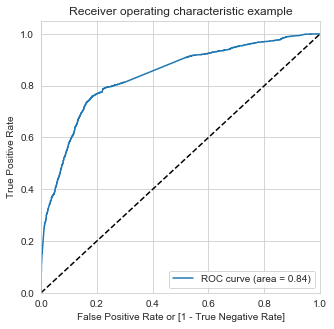

In [144]:
#Draw the ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [145]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.209971,5123,0,1,1,1,0,0,0,0,0,0,0
1,0,0.186673,6322,0,1,1,0,0,0,0,0,0,0,0
2,0,0.145396,3644,0,1,1,0,0,0,0,0,0,0,0
3,0,0.191611,3011,0,1,1,0,0,0,0,0,0,0,0
4,0,0.081023,8140,0,1,0,0,0,0,0,0,0,0,0


In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


""" TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives """

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378084  1.000000  0.000000
0.1   0.1  0.447055  0.989791  0.117107
0.2   0.2  0.633496  0.915224  0.462223
0.3   0.3  0.792750  0.761651  0.811657
0.4   0.4  0.794596  0.697292  0.853751
0.5   0.5  0.784192  0.625832  0.880464
0.6   0.6  0.769592  0.534842  0.912304
0.7   0.7  0.746770  0.422992  0.943605
0.8   0.8  0.728478  0.323125  0.974906
0.9   0.9  0.710186  0.251664  0.988937


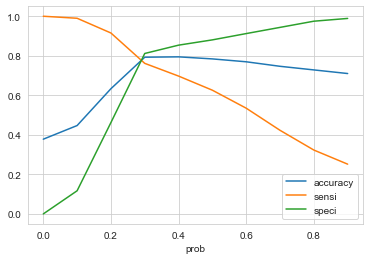

In [147]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.255 is the optimum point to take it as a cutoff probability.

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.255 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.209971,5123,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.186673,6322,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.145396,3644,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.191611,3011,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.081023,8140,0,1,0,0,0,0,0,0,0,0,0,0


In [149]:
# Let's check the overall accuracy.
accuracy = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

#Print accuracy
round(accuracy,2)*100

78.0

In [150]:
#Check the confusion matrix 
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

#Check the matrix
confusion2

array([[2865,  841],
       [ 472, 1781]], dtype=int64)

In [151]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7905015534842432

In [153]:
# Let us calculate specificity
TN / float(TN+FP)

0.7730706961683756

In [154]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22692930383162438


In [155]:
# Positive predictive value 
print (TP / float(TP+FP))

0.679252479023646


In [156]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8585555888522625


### Model evaluvation through Precision and Recall

In [157]:
#Find the precision and recall 
report = classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

#Print the report
print(report)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      3706
           1       0.68      0.79      0.73      2253

    accuracy                           0.78      5959
   macro avg       0.77      0.78      0.77      5959
weighted avg       0.79      0.78      0.78      5959



In [158]:
#Precision score
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

#Print the score
round(precision,2)*100

68.0

In [159]:
#Recall Score
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

#Print the score
round(recall,2)*100

79.0

In [160]:
#Precision recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

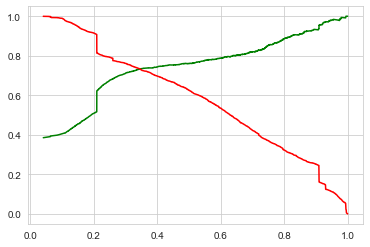

In [161]:
#Draw the trade off between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Prediction On Test set

In [162]:
#transform the numerical columns
X_test[num_col] = scaler.transform(X_test[num_col])

In [163]:
X_test = X_test[['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Do Not Email_Yes', 'Specialization_Others','What is your current occupation_Working Professional']]

In [164]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Do Not Email_Yes,Specialization_Others,What is your current occupation_Working Professional
7358,0.486244,-0.191492,0,1,0,0,1,0
8398,3.355082,2.528656,0,0,0,0,1,0
3472,1.305912,-0.584524,0,1,0,0,0,0
8673,0.076410,0.671351,0,0,0,0,0,0
8053,0.076410,1.477524,0,1,0,0,1,0


In [165]:
#Add the constant
X_test_sm = sm.add_constant(X_test)

Make prediction on the test set

In [166]:
#Predict on the test set
y_test_pred = res8.predict(X_test_sm)

In [167]:
#Print the probability
y_test_pred[:10]

7358    0.274919
8398    0.917821
3472    0.183990
8673    0.339638
8053    0.680914
6385    0.174015
5396    0.098952
7152    0.209971
7013    0.771137
7903    0.209971
dtype: float64

In [168]:
# Converting y_pred to a dataframe which is an array
y_pred = pd.DataFrame(y_test_pred)

In [169]:
# Let's see the head
y_pred.head()

,0
7358,0.274919
8398,0.917821
3472,0.183990
8673,0.339638
8053,0.680914


In [170]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [171]:
#Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [172]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

#Check the head
y_pred_final.head()

,Converted,ID,0
0,0,7358,0.274919
1,0,8398,0.917821
2,0,3472,0.183990
3,1,8673,0.339638
4,1,8053,0.680914


In [173]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [174]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','Converted','Converted_Prob'], axis=1)

In [175]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ID,Converted,Converted_Prob
0,7358,0,0.274919
1,8398,0,0.917821
2,3472,0,0.183990
3,8673,1,0.339638
4,8053,1,0.680914


In [176]:
#Create a new column with threshold of 0.26
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.255 else 0)

In [177]:
y_pred_final.head()

,ID,Converted,Converted_Prob,final_predicted
0,7358,0,0.274919,1
1,8398,0,0.917821,1
2,3472,0,0.183990,0
3,8673,1,0.339638,1
4,8053,1,0.680914,1


In [178]:
# Let's check the overall accuracy.
accuracy = accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

#Print the accuracy
round(accuracy,2)*100

78.0

In [179]:
#Check the confusion matrix
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1261,  340],
       [ 228,  725]], dtype=int64)

In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [181]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7607555089192025

In [182]:
# Let us calculate specificity
TN / float(TN+FP)

0.787632729544035

In [183]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.212367270455965


In [184]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6807511737089202


In [185]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8468770987239759


In [186]:
#Precision score
precision = precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

#Print the score
round(precision,2)*100

68.0

In [187]:
#Recall Score
recall = recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

#Print the score
round(recall,2)*100

76.0

In [188]:
#Find the precision and recall for threshold 0.255
report = classification_report(y_pred_final.Converted, y_pred_final.final_predicted)

#Print the report
print(report)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1601
           1       0.68      0.76      0.72       953

    accuracy                           0.78      2554
   macro avg       0.76      0.77      0.77      2554
weighted avg       0.78      0.78      0.78      2554



In [189]:
#Create a new column for Lead Score
y_pred_final['Lead_Score'] = round(y_pred_final["Converted_Prob"]*100,2)

In [190]:
y_pred_final.tail()

,ID,Converted,Converted_Prob,final_predicted,Lead_Score
2549,7135,0,0.209971,0,21.00
2550,5326,1,0.227575,0,22.76
2551,3462,1,0.195924,0,19.59
2552,4546,1,0.607681,1,60.77
2553,2331,0,0.104055,0,10.41


## Conclusion

- Potential hot leads comes from the Add Forms, almost everyone filled form had converted, so the sales team needs to concentrate more on the people who fill forms first.
- Google plays vital role for our customer getting converted, so sales team can publish forms on google.
- Olark Chart also brings significant amount of convertion rate, so more number of sales resourse needs to be available at Olark Chart, to resolve customers queries and make them potential customers.
- More number of working professional are getting converted to as our customers, so sales team should contact the Working professionals first.
- People are more interested in many forms of specializations other than, Finance, HR management and Marketing management, more number of such different courses needs to be brought into website, so that more number of people gets converted.
- Many people have converted who has choosen Do Not Email Yes, instaed of mail, sales team can contact then through other means.
- People who spend much time on the wedsite have higher chances of conversion. Sales team can identify such people and contact them first.
- People who visited the site multiple times also have higher chances to convert to our potential customer. Sales team can identify such people and contact them first.


#### Model is a stable model as it has a balance of accuracy 78%, sensitivity of 79% and specificity of 77%. Model is able to predict 79% of positive class correctly.
